## Programs with more than one part

So far, we've focused on simple programs with only one part, but real programs have several different parts, often with data dependencies.
Some parts will be amenable to optimization and/or parallelism and others will not.
![Diminishing returns](https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Optimizing-different-parts.svg/2880px-Optimizing-different-parts.svg.png)
This principle is called [Amdahl's Law](https://en.wikipedia.org/wiki/Amdahl%27s_law).

In [1]:
def exec_time(f, p, n=10, latency=1):
    # Suppose that a fraction f of the total work is amenable to optimization
    # We run a problem size n with parallelization factor p
    return latency + (1-f)*n + f*n/p

Text(0, 0.5, 'time')

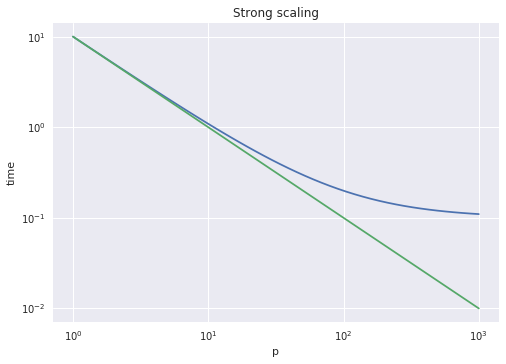

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy as np
plt.style.use('seaborn')

ps = np.geomspace(1, 1000)

plt.loglog(ps, exec_time(.99, ps, latency=0))
plt.loglog(ps, exec_time(1, ps, latency=0))
plt.title('Strong scaling')
plt.xlabel('p')
plt.ylabel('time')

## Strong scaling: fixed total problem size

### Cost = `time * p`

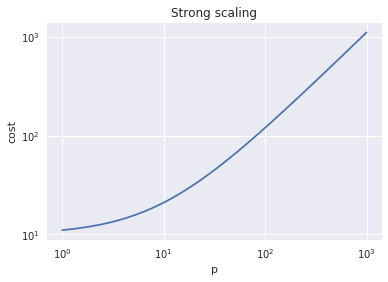

In [3]:
def exec_cost(f, p, **kwargs):
    return exec_time(f, p, **kwargs) * p

plt.loglog(ps, exec_cost(.99, ps))
plt.title('Strong scaling')
plt.xlabel('p')
plt.ylabel('cost');

### Efficiency

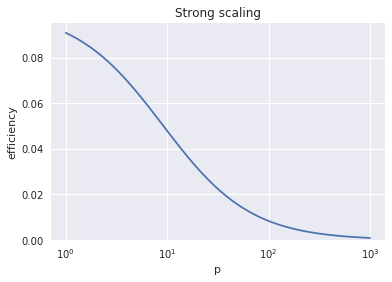

In [4]:
plt.semilogx(ps, 1/exec_cost(.99, ps, latency=1))
plt.title('Strong scaling')
plt.xlabel('p')
plt.ylabel('efficiency')
plt.ylim(bottom=0);

### Speedup

$$ S(p) = \frac{T(1)}{T(p)} $$

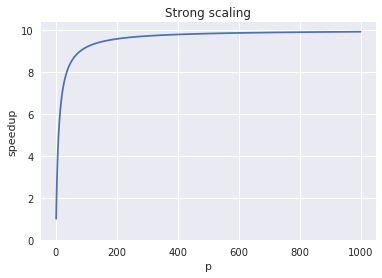

In [5]:
plt.plot(ps, exec_time(.99, 1, latency=1) / exec_time(.99, ps, latency=1))
plt.title('Strong scaling')
plt.xlabel('p')
plt.ylabel('speedup')
plt.ylim(bottom=0);

## Stunt 1: Report speedup, not absolute performance!
![Hager](https://blogs.fau.de/hager/files/2010/07/stunt1.jpg)

## Efficiency-Time spectrum (my preference)

People care about two observable properties
* **Time** until job completes
* **Cost** in core-hours or dollars to do job

Most HPC applications have access to large machines, so don't really care how many processes they use for any given job.

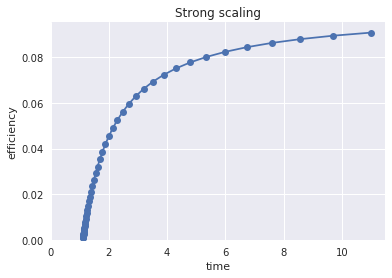

In [6]:
plt.plot(exec_time(.99, ps), 1/exec_cost(.99, ps), 'o-')
plt.title('Strong scaling')
plt.xlabel('time')
plt.ylabel('efficiency')
plt.ylim(bottom=0);
plt.xlim(left=0);

#### Principles
* [No "soft" `log` scale](https://blogs.fau.de/hager/archives/5835)
* Both axes have tangible units
* Bigger is better on the $y$ axis

## Weak Scaling: Fixed work per processor

We've kept the problem size $n$ fixed thus far, but parallel computers are also used to solve large problems.  If we keep the amount of work per processor fixed, we are [weak/Gustafson scaling](https://en.wikipedia.org/wiki/Gustafson's_law).

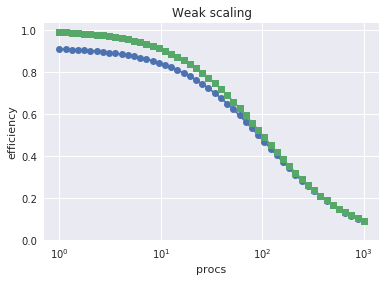

In [7]:
ns = 10*ps
plt.semilogx(ps, ns/exec_cost(.99, ps, n=ns, latency=1), 'o-')
ns = 100*ps
plt.semilogx(ps, ns/exec_cost(.99, ps, n=ns, latency=1), 's-')
plt.title('Weak scaling')
plt.xlabel('procs')
plt.ylabel('efficiency')
plt.ylim(bottom=0);

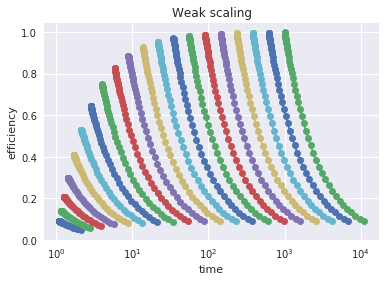

In [8]:
for w in np.geomspace(0.1, 1e3, 20):
    ns = w*ps
    plt.semilogx(exec_time(.99, ps, n=ns, latency=1),
                 ns/exec_cost(.99, ps, n=ns, latency=1), 'o-')
plt.title('Weak scaling')
plt.xlabel('time')
plt.ylabel('efficiency')
plt.ylim(bottom=0);

## [Fuhrer et al (2018): Near-global climate simulation at 1 km resolution](https://www.geosci-model-dev.net/11/1665/2018/gmd-11-1665-2018.pdf)

![Fuhrer (2018)](fuhrer2018-fig4.png)

I replotted these data for [my talk](https://jedbrown.org/files/20190822-Latsis.pdf) at the [Latsis Symposium](https://latsis2019.ethz.ch/) last month.

![Fuhrer (2018) replotted](fuhrer2018-scaling-time-ann4.png)

# Further resources
* [Hager: Fooling the masses](https://blogs.fau.de/hager/archives/5260)
* [Belli and Hoefler: Scientific Benchmarking of Parallel Computing Systems](https://htor.inf.ethz.ch/publications/index.php?pub=222)

Please read/watch something from this list and be prepared to share on Monday.